<a href="https://www.kaggle.com/code/ayushs9020/raw-roberta-base-training-commonlit?scriptVersionId=136830556" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#006600; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">RoBERTa</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
<img src = "https://media.tenor.com/pfcqgFEp2OsAAAAM/welcome.gif" wdith = 600>
   
$RoBERTa$ $Robustly$ $Optimized$ $BERT$ $Pretraining$ $Approach$ is a $Natural$ $Language$ $Processing$ $Model$ that was introduced in the paper **[RoBERTa: A Robustly Optimized BERT Pretraining Approach](https://arxiv.org/pdf/1907.11692.pdf)** by `Yinhan Liu` et al. in $2019$. It is based on the $BERT$ $Model$, but it makes a number of modifications to the pretraining procedure that improve its performance.

One of the key differences between $RoBERTa$ and $BERT$ is that $RoBERTa$ uses a `larger batch size` and a `higher learning rate` during pretraining. This allows $RoBERTa$ to learn `more effectively` from the training data. Additionally, $RoBERTa$ removes the `next sentence prediction task` from the pretraining procedure. This task was originally used in BERT to help the model learn the relationship between sentences, but $RoBERTa$ found that it was `not necessary` for `good performance`.

$RoBERTa$ has been shown to outperform $BERT$ on a number of $Natural$ $Language$ $Processing$ $Tasks$, including 
* $Question$ $Answering$
* $Natural$ $Language$ $Inference$
* $Text$ $Summarization$

<img src = "https://www.researchgate.net/publication/352642553/figure/fig2/AS:1037416861282304@1624350862022/The-RoBERTa-model-architecture.ppm" width = 400>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FF0000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF0000">1 | Goal ⚖️</p>

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://sayingimages.com/wp-content/uploads/inspirational-today-is-the-day-memes.jpg" width = 200>
    
In this notebook we will try to `train minimalistic` $RoBERTa-Base$ solution, with `no pre-training`/`post-processing`, and see the results 

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#800080; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #800080">2 | Basic Terminologies 🗄️</p>

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://media.makeameme.org/created/when-you-realise-5bf710.jpg" width = 400>
    
* $Transformers$
* $BERT$ $Bidirection$ $Encoder$ $Representation$ $from$ $Transformers$

## $2.1$ $|$ $Transformers$
    
* **$What$** - `Transformers` are a type of $Neural$ $Network$ $Architecture$ that has been shown to be very `effective` for $Natural$ $Language$ $Processing$ $(NLP)$ tasks. They are based on the `attention mechanism`, which allows them to `learn long-range dependencies` between words in a sequence.
* **$Why$** - `Transformers` have been shown to `achieve state-of-the-art results` on a wide range of $NLP$ tasks, including 
* * $Machine$ $Translation$
* * $Text$ $Summarization$
* * $Question$ $Answering$
* **$How$** - `Transformer` consists of an `Encoder` and a `Decoder`.
* * $Encoder$ - Takes a `sequence of words` as `input` and `produces a sequence` of `hidden states`
* * $Decoder$ - Takes these `hidden states` as `input` and `produces a sequence` of `output words`

The $Attention$ $Mechanism$ allows the $Transformer$ to learn which words in the input sequence are `most relevant` to each output word. This is done by computing a `score for each word` in the input sequence, and then using these scores to `weight the contribution` of each word to the hidden state of the decoder
    
<img src = "https://machinelearningmastery.com/wp-content/uploads/2021/08/attention_research_1.png" width = 400>
    
## $2.2$ $|$ $BERT$

$BERT$ $Bidirectional$ $Encoder$ $Representations$$ from $Transformers$ is a popular $Natural$ $Language$ $Processing$ $Model$ that has been shown to be `effective` for a variety of tasks, including 

* $Question$ $Answering$
* $Sentiment$ $Analysis$
* $Natural$ $Language$ $Inference$

One of the `key components` of BERT is the `tokenizer`, which is responsible for dividing text into tokens that can be understood by the model.

The $BERT$ $Tokenizer$ uses a technique called $Wordpiece$ $Tokenization$, which `breaks words` into `subwords`. This is done to address the `problem of rare words`, which may not be present in the BERT vocabulary. For example, the word "sleeping" would be tokenized as "sleep" and ""##ing".

In addition to wordpiece tokenization, the BERT tokenizer also adds a few special tokens to the vocabulary. These tokens include:

* `[CLS]` - This token is used to represent the beginning of a sentence.
* `[SEP]` - This token is used to represent the end of a sentence.
* `[PAD]` - This token is used to pad sequences to a fixed length.

<img src = "https://miro.medium.com/v2/resize:fit:876/0*ViwaI3Vvbnd-CJSQ.png" width = 400>

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">3 | Data 🚀</p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://images.squarespace-cdn.com/content/v1/5cf6c4ed5171fc0001b43190/1611069608878-TJ33SH2M09MDAVXJ2Y7Y/data+engineers.png" width = 300>
    
Now lets dive into the data
    
**We will only focus on the training Data**

In [1]:
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/common-lit-samples/Falcon 7B/Train Embeds.npy
/kaggle/input/common-lit-samples/Flan T5/Train Embeds.npy
/kaggle/input/common-lit-samples/RoBERTa/Train Embeds.npy
/kaggle/input/common-lit-samples/Bert Based/Train Embeds
/kaggle/input/commonlit-evaluate-student-summaries/sample_submission.csv
/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv
/kaggle/input/commonlit-evaluate-student-summaries/summaries_test.csv
/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv
/kaggle/input/commonlit-evaluate-student-summaries/prompts_test.csv


<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $2.1$ $|$ $Train$ 
    
We have our training data in two different directories `prompts_train`/`summaries_train`

In [2]:
train_pro = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/prompts_train.csv")
train_pro

,prompt_id,prompt_question,prompt_title,prompt_text
0,39c16e,Summarize at least 3 elements of an ideal trag...,On Tragedy,Chapter 13 \r\nAs the sequel to what has alrea...
1,3b9047,"In complete sentences, summarize the structure...",Egyptian Social Structure,Egyptian society was structured like a pyramid...
2,814d6b,Summarize how the Third Wave developed over su...,The Third Wave,Background \r\nThe Third Wave experiment took ...
3,ebad26,Summarize the various ways the factory would u...,Excerpt from The Jungle,"With one member trimming beef in a cannery, an..."


<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

This file contains the actual text values given by the children as the answers to the prompt

In [3]:
train_sum = pd.read_csv("/kaggle/input/commonlit-evaluate-student-summaries/summaries_train.csv")
train_sum.head()

,student_id,prompt_id,text,content,wording
0,000e8c3c7ddb,814d6b,The third wave was an experimentto see how peo...,0.205683,0.380538
1,0020ae56ffbf,ebad26,They would rub it up with soda to make the sme...,-0.548304,0.506755
2,004e978e639e,3b9047,"In Egypt, there were many occupations and soci...",3.128928,4.231226
3,005ab0199905,3b9047,The highest class was Pharaohs these people we...,-0.210614,-0.471415
4,0070c9e7af47,814d6b,The Third Wave developed rapidly because the ...,3.272894,3.219757


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FF0000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF0000">3 | Tkenization + Preprocessing ⚙️</p>

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://img-9gag-fun.9cache.com/photo/aMZb4d1_460s.jpg" width = 400>
    
Here we will use the Robert a Tokenizer

In [4]:
import os 
import numpy as np 
import tqdm
from sklearn.decomposition import PCA
from transformers import AutoTokenizer , AutoModel , AutoConfig

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

## $4.1$ $|$ $RoBERTa$

$RoBERTa$ $Robustly$ $Optimized$ $BERT$ $Pretraining$ $Approach$ is a $Natural$ $Language$ $Processing$ $(NLP)$ model that was proposed in $2019$ by `Yinhan` Liu et al. It is a `reimplementation` of $BERT$ ($Bidirectional$ $Encoder$ $Representations$ from $Transformers$) with some `modifications` to the key `hyperparameters` and `minor embedding tweaks`. These modifications led to `significant performance gains` on a number of NLP tasks. $RoBERTa$ is based on the `transformer architecture`, which is a `Neural Network Architecture` that is particularly well-suited for NLP tasks. The transformer architecture uses `self-attention` to learn `long-range dependencies` between words in a sentence. This allows $RoBERTa$ to learn more `contextual representations` of words, which is important for many NLP tasks.

$RoBERTa$ is trained on a `massive dataset` of text and code. The dataset consists of `books`/`articles`/`code`. The dataset is `preprocessed` using `Byte-Level` `BPE` `(Byte Pair Encoding)`, which is a technique for tokenizing text into smaller units.

$RoBERTa$ is trained using a `Masked Language Modeling` ($MLM$) objective. In the MLM objective, some of the words in a `sentence are masked`, and the model is then trained to `predict the masked words`. This helps the model to `learn the contextual representations` of words.

In [5]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

In [6]:
tokenizer

RobertaTokenizerFast(name_or_path='roberta-base', vocab_size=50265, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=False)}, clean_up_tokenization_spaces=True)

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

If we pass a sample text into the tokenizer like `Mosquitos are Upgraded Vampires`

In [7]:
tokenizer("Mosquitoes are upgraded Vanpires" , return_tensors = "pt")

{'input_ids': tensor([[    0, 42954, 35508,  8013,    32,  7084,  3415, 37756,     2]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [8]:
conf = AutoConfig.from_pretrained("roberta-base")
conf.update({"output_hidden_states":True,
               "hidden_dropout_prob": 0.0,
               "layer_norm_eps": 1e-7})
model = AutoModel.from_pretrained("roberta-base" , config = conf)

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.layer_norm.weight', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
model(tokenizer("Mosquitoes are upgraded Vanpires" , return_tensors = "pt")["input_ids"])[0] , model(tokenizer("Mosquitoes are upgraded Vanpires" , return_tensors = "pt")["input_ids"])[0].shape

(tensor([[[-0.0410,  0.0942, -0.0367,  ..., -0.0312, -0.0457, -0.0400],
          [-0.0718,  0.3932, -0.0201,  ...,  0.3021, -0.0731, -0.0426],
          [ 0.1105,  0.4120, -0.1697,  ...,  0.0514, -0.2602, -0.1185],
          ...,
          [ 0.0083, -0.0335,  0.0168,  ...,  0.0523, -0.0045, -0.0924],
          [-0.0769,  0.0848, -0.0222,  ...,  0.0340, -0.0537, -0.0936],
          [-0.0421,  0.0963, -0.0645,  ..., -0.0657, -0.0460, -0.0635]]],
        grad_fn=<NativeLayerNormBackward0>),
 torch.Size([1, 9, 768]))

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

We get a 2D matrix of shape $(9 , 768)$, but we only need $(768)$ values. Thtas why we will apply $PCA$ on this, so that we can extract them easily in $1$ Dimension

In [10]:
pca = PCA(n_components = 1)
pca.fit_transform(model(tokenizer("Mosquitoes are upgraded Vanpires" , 
                                  return_tensors = "pt")["input_ids"])[0].squeeze().detach().numpy().T).squeeze().shape

(768,)

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we will apply this tokenizer on our whole dataset 

In [11]:
train = train_pro.merge(train_sum , on = "prompt_id")

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

The process can take a lot of time. Thats why I have exported the data before and we will now import that Data 

In [12]:
np.load("/kaggle/input/common-lit-samples/RoBERTa/Train Embeds.npy")

array([[ 4.9947572e-01, -5.1261816e-02,  6.6850442e-01, ...,
        -7.6826829e-01,  9.4289762e-01, -3.3205426e-01],
       [ 4.9947584e-01, -5.1261500e-02,  6.6850460e-01, ...,
        -7.6826829e-01,  9.4289792e-01, -3.3205464e-01],
       [ 4.9947608e-01, -5.1261351e-02,  6.6850471e-01, ...,
        -7.6826817e-01,  9.4289798e-01, -3.3205488e-01],
       ...,
       [-2.0808433e-04, -6.8610179e-01,  3.8957912e-01, ...,
        -1.4865828e+00, -1.4868030e-01,  1.9873266e-01],
       [-2.0813041e-04, -6.8610144e-01,  3.8957933e-01, ...,
        -1.4865828e+00, -1.4867999e-01,  1.9873272e-01],
       [-2.0805877e-04, -6.8610185e-01,  3.8957933e-01, ...,
        -1.4865828e+00, -1.4868012e-01,  1.9873278e-01]], dtype=float32)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#800080; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #800080">5 | Pytorch DataLoader 💡</p>

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

**Sorry, I could not find a good relatable meme with this title, consider this Panda as meme**

<img src = "https://i.ytimg.com/vi/v_cpPMjE0vU/maxresdefault.jpg" width = 400>

Now we can simply take input from the working files 

In [13]:
import torch 
from torch.utils.data import Dataset

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

First lets make a simple class

In [14]:
class PT_DataSet(Dataset):pass

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now lets make the constructor 

In [15]:
class PT_Dataset(Dataset):
    
    def __init__(self):pass

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now lets load our files

In [16]:
train = train_pro.merge(train_sum , on = "prompt_id")
train.to_csv("/kaggle/working/Train")

In [17]:
class PT_DataSet(Dataset):
    
    def __init__(self):
        
        self.embeds = np.load("/kaggle/input/common-lit-samples/RoBERTa/Train Embeds.npy")
        self.targets = pd.read_csv("/kaggle/working/Train")

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

Now we will just intialize some Getters

In [18]:
class PT_DataSet(Dataset):
    
    def __init__(self):
        
        self.embeds = np.load("/kaggle/input/common-lit-samples/RoBERTa/Train Embeds.npy" , 
                             allow_pickle = True)
        self.targets = pd.read_csv("/kaggle/working/Train")["content"]
        
    def __len__(self):return self.embeds.shape[0]
    
    def __getitem__(self , index):
        
        embeds = torch.tensor(self.embeds[index] , dtype = torch.float32)
        targets = torch.tensor(self.targets[index] , dtype = torch.float32)
        
        return embeds , targets

<div style="border-radius:10px; border:#800080 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

And we are done 

In [19]:
train = PT_DataSet()

In [20]:
train = torch.utils.data.DataLoader(train , shuffle = True , batch_size = 1)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">6 | Model Setup 🔱</p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://miro.medium.com/v2/resize:fit:800/1*kc2gOaBinQKfDKOonv3I1A.png" width = 400>
    
We will now create a `Simple` $Attention$-Based$ $Regression$ $Model$. It will consist of two parts

* $Attention$ $Layer$ - Takes an `input` of size $768$ and `outputs a sequence of weights` of the same size. The `weights` represent the `importance of each input feature` to the output. The `context vector` is then calculated by `multiplying the input features by the weights`.

* $Regressor$ $Layer$ - Takes the `context vector` as `input` and `outputs` a `single value`. This value will be the `predicted output` of the model.

In [21]:
import torch.nn as nn

In [22]:
class Model(nn.Module):
    
    def __init__(self):

        super().__init__()
        
        self.layer_norm = nn.LayerNorm(768)
        self.dropouts = nn.Dropout(0.3)

        self.attention = nn.Sequential(
            nn.Linear(768 , 512) , 
            nn.Tanh() , 
            nn.Linear(512 , 300) , 
            nn.Tanh() , 
            nn.Linear(300 , 100) , 
            nn.Tanh() , 
            nn.Linear(100 , 768) , 
            nn.Softmax(dim = 0)
        )

        self.regressor = nn.Sequential(
            nn.Linear(768 , 1)
        )

    def forward(self , inputs):
        
        inputs = self.layer_norm(inputs)
        inputs = self.dropouts(inputs)
        
        weights = self.attention(inputs)

        context_vector = weights * inputs 

        output = self.regressor(context_vector)

        return output.squeeze()

In [23]:
model = Model()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FF0000; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FF0000">7 | Loss Function 🔮</p>

<div style="border-radius:10px; border:#FF0000 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://i.chzbgr.com/full/9149821696/h77B61D5A/is-this-loss-memes-right-finally-found-him-yeah-why-lets-see-if-u-keep-posting-shit-after-this" width = 400>

$Mean$ $Squared$ $Error$ $(MSE)$ is a `loss function` used in $Machine$ $Learning$ to measure the `difference between` the `predicted output` of a model and the `actual output`. $MSE$ is calculated by taking the `square` of the `difference` between the `predicted` and `actual outputs`, and then `averaging` the `squared differences` over all of the samples in the dataset.

$$MSE = \frac{1}{n}\sum((y_p - y_a)^2)$$

In [24]:
loss = nn.MSELoss()

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">8 | Optimizer ⚙️</p>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyZlX-6Np3eYMuyBB89NjBNp4QXYIJcgGNtZtALycCgc0V6dUehWDK8gS8ILz9Z_moPEE&usqp=CAU" width = 400>
    
An $Optimizer$ is an `algorithm` or function that `updates the weights and biases` of a neural network in order to `minimize a loss function`. 

Here we will be using the `Adam Optimizer`

$Adam$ is an $Adaptive$ $Learning$ $Rate$ method, which works by `maintaining two moving averages of the gradients`
* $Mean$ - Calculate the `momentum term`, which helps to `prevent` the `optimizer` from `getting stuck in local minima`
* $Variance$ - Calculate the `learning rate`, which is `adjusted based on the magnitude of the gradients`.

$$m_t = \beta_1 * m_{t - 1} + (1 - \beta_1) * w_t$$

$$v_t = \beta_2 * m_{t - 1} + (1 - \beta_2) * w_t$$

$$m_t = \frac{m_t}{1 - \beta_1^t}$$

$$v_t = \frac{v_t}{1 - \beta_2^t}$$

$$w_{t+1} = w_t - \frac{n}{\sqrt{v_t + e}} * m_t$$

In [25]:
optim = torch.optim.Adam(model.parameters() , lr = 0.1)

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFC0CB; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFC0CB">9 | Training Loop 🔁</p>

<div style="border-radius:10px; border:#FFC0CB0 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://miro.medium.com/v2/resize:fit:552/1*lKc-R1JFGKVjBkX_wmDQfg.jpeg" width = 400>
    
Lets now start the training loop

In [26]:
losss = []
for x , y in tqdm.tqdm(train, total = len(train)):

    x = torch.tensor(x , dtype = torch.float32)
    y = torch.tensor(y , dtype = torch.float32)

    output = model(x)

    losses = loss(output , y)

    losses.backward()

    optim.step()

    losss.append(losses)

  0%|          | 0/7165 [00:00<?, ?it/s]/tmp/ipykernel_20/1992858617.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x , dtype = torch.float32)
/tmp/ipykernel_20/1992858617.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y = torch.tensor(y , dtype = torch.float32)
/opt/conda/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 7165/7165 [00:52<00:00, 135.88it/s]


# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFA500; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFA500">10 | Visualization 📈</p>

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

<img src = "https://datasciencedojo.com/wp-content/uploads/10.jpg" width = 400>
    
Lets now see how our model worked
    
Before I show you the loss, I was not expecting this loss. But here it is 

In [27]:
import seaborn as sns

<Axes: >

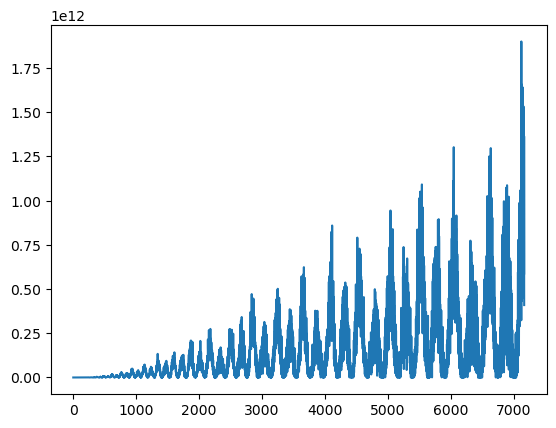

In [28]:
sns.lineplot([x.cpu().detach().numpy().tolist() for x in losss])

<div style="border-radius:10px; border:#FFA500 solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">

We will surely work to improve this loss

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#FFC0CB; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #FFC0CB">11 | TO DO LIST 📝</p>

<div style="border-radius:10px; border:#FFC0CB solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
<img src = "https://i.imgflip.com/7sgop6.jpg" width = 400>   

* TO DO 2 : IMRPOVE THE RESULTS
* TO DO 3 : LESS TRAINING TIME
* TO DO 4 : DANCE 

# <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#00FFFF; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #00FFFF">12 | Ending 🏁</p>

<div style="border-radius:10px; border:#00FFFF solid; padding: 15px; background-color: #F3f9ed; font-size:100%; text-align:left">
    
**THAT IT FOR TODAY GUYS**

**WE WILL GO DEEPER INTO THE DATA IN THE UPCOMING VERSIONS**

**PLEASE COMMENT YOUR THOUGHTS, HIHGLY APPRICIATED**

**DONT FORGET TO MAKE AN UPVOTE, IF YOU LIKED MY WORK $:)$**
    
<img src = "htTps://i.imgflip.com/19aadg.jpg">
    
**PEACE OUT $!!!$**